Dataset Overview:
Number of companies: 31
Sectors covered: 9
Sector distribution:
Sector
Automotive        7
FMCG              7
Engineering       5
Cement            4
Paints            3
Steel             2
Petrochemicals    1
Metals            1
Chemicals         1
Name: count, dtype: int64

Basic Statistics:
            ROCE  EV_EBITDA  Market_Cap_Cr
count  31.000000  31.000000      31.000000
mean   19.374194  26.070968    1547.258065
std     6.997665  17.792549    3188.563898
min     8.500000   6.800000      85.000000
25%    13.600000  12.650000     350.000000
50%    18.900000  20.300000     520.000000
75%    24.150000  34.000000    1150.000000
max    34.500000  72.300000   17500.000000

STATISTICAL ANALYSIS
Correlation between ROCE and EV/EBITDA: 0.886
Linear regression R-squared: 0.784
P-value: 0.000
Regression equation: EV/EBITDA = -17.56 + 2.25 * ROCE

Sector-wise ROCE Analysis:
                 ROCE             EV_EBITDA        ROCE_EV_Ratio
                 mean   std count 

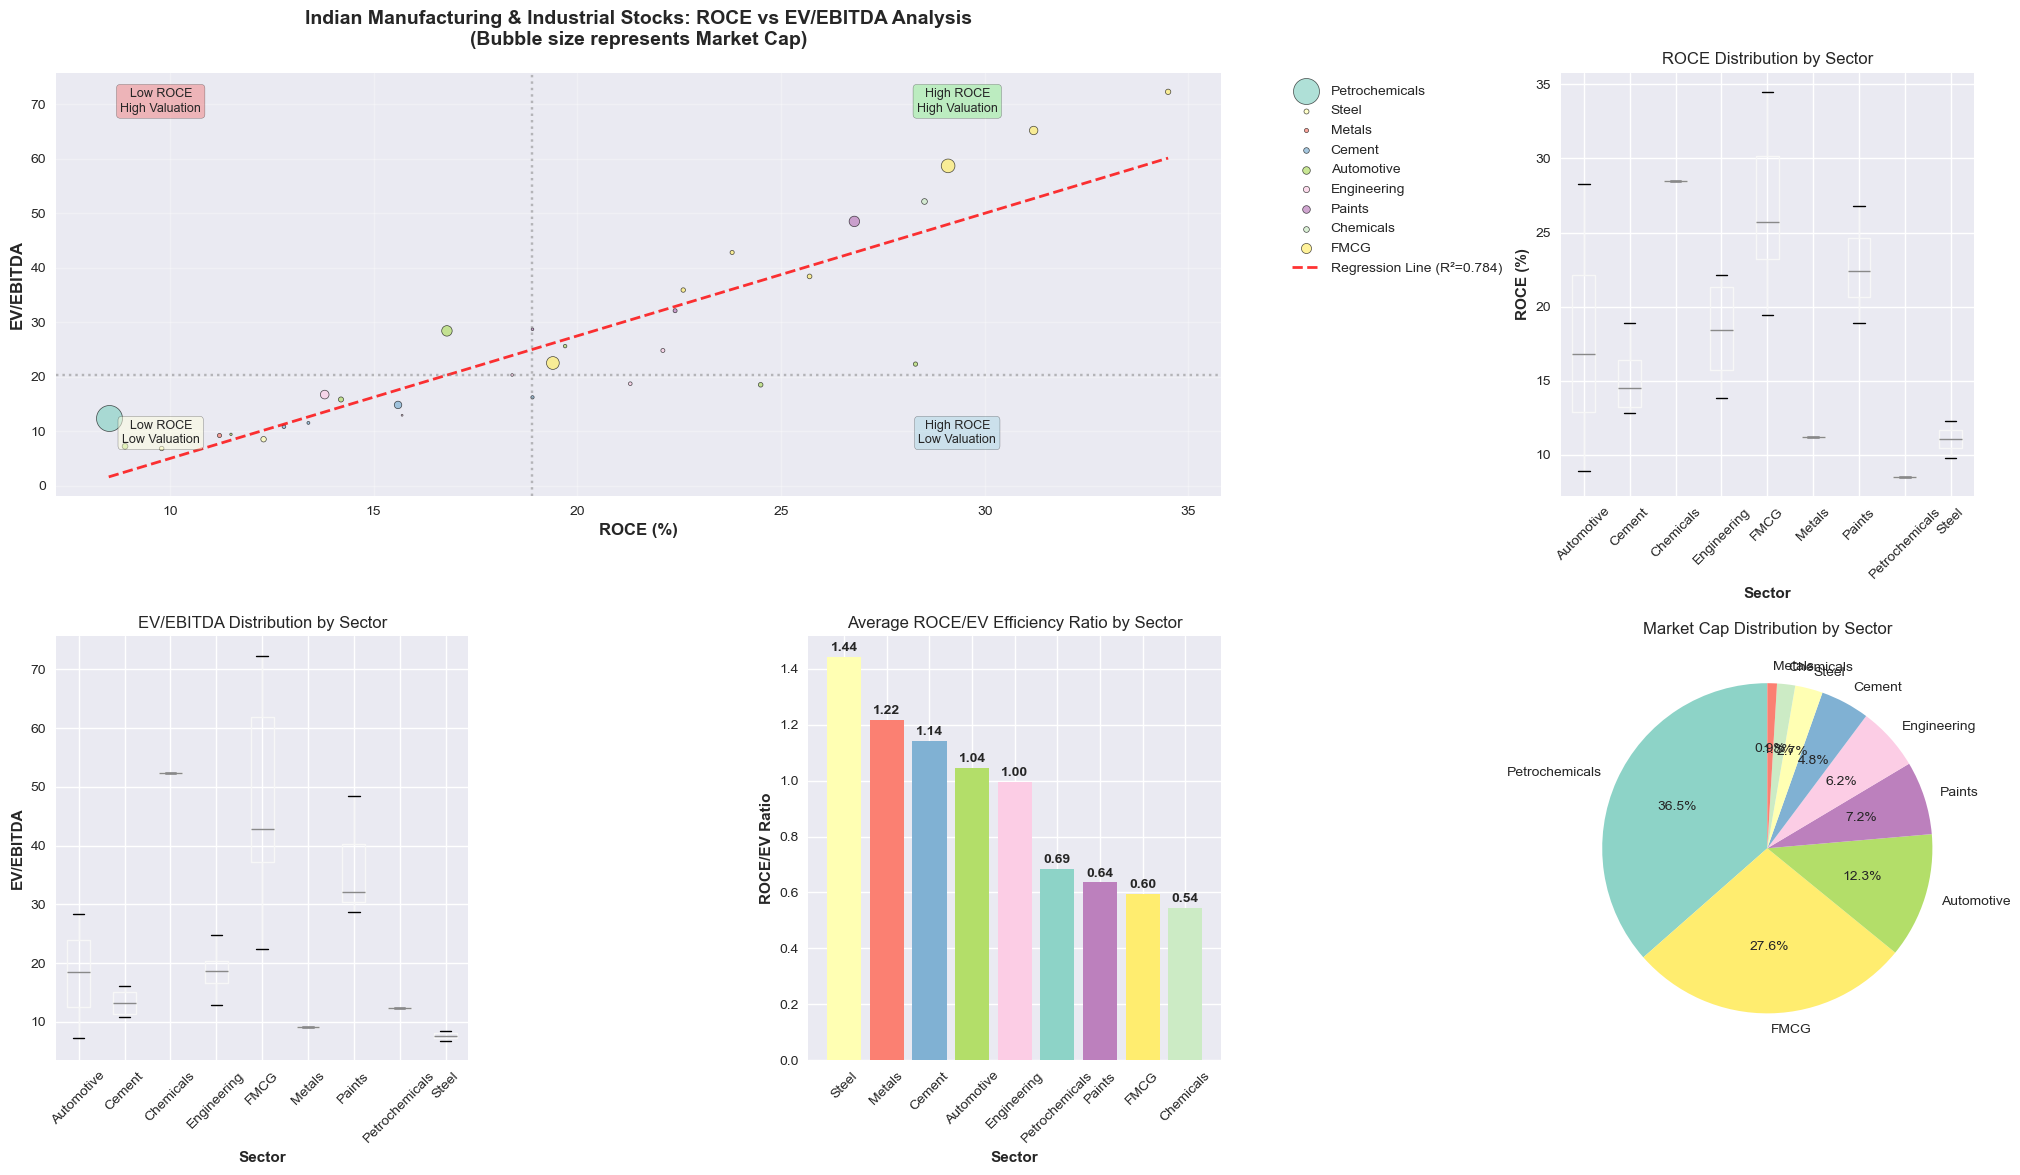


ADVANCED STATISTICAL INSIGHTS
ROCE Outliers:
No significant outliers found in ROCE

EV/EBITDA Outliers:
              Company  EV_EBITDA Sector
29  Colgate-Palmolive       72.3   FMCG

Value Investment Candidates (High ROCE, Low EV/EBITDA):
          Company  ROCE  EV_EBITDA       Sector
8      Bajaj Auto  24.5       18.5   Automotive
19  Havells India  21.3       18.7  Engineering

Sector Efficiency Ranking:
                 ROCE  EV_EBITDA  ROCE_EV_Ratio  Efficiency_Score
Sector                                                           
Chemicals       28.50      52.30           0.54         17.405927
FMCG            26.61      47.97           0.60         16.299542
Paints          22.70      36.43           0.64         14.059198
Engineering     18.26      18.68           1.00         11.812531
Automotive      17.70      18.17           1.04         11.500572
Cement          15.18      13.32           1.14         10.309201
Steel           11.05       7.65           1.44          8

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [1]:
# Indian Manufacturing & Industrial Stocks: ROCE vs EV/EBITDA Analysis
# Author: Financial Analytics Team
# Date: July 2025

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Sample data for major Indian manufacturing and industrial companies
# Note: In practice, you would fetch this data from financial APIs or databases
manufacturing_data = {
    'Company': [
        'Reliance Industries', 'Tata Steel', 'JSW Steel', 'Hindalco Industries',
        'UltraTech Cement', 'Shree Cement', 'ACC Limited', 'Ambuja Cements',
        'Bajaj Auto', 'Hero MotoCorp', 'Maruti Suzuki', 'Tata Motors',
        'Mahindra & Mahindra', 'Eicher Motors', 'Ashok Leyland',
        'L&T', 'Siemens', 'ABB India', 'Crompton Greaves', 'Havells India',
        'Asian Paints', 'Berger Paints', 'Kansai Nerolac', 'Pidilite Industries',
        'ITC', 'Britannia Industries', 'Nestle India', 'Godrej Consumer',
        'Hindustan Unilever', 'Colgate-Palmolive', 'Dabur India'
    ],
    'ROCE': [
        8.5, 12.3, 9.8, 11.2, 15.6, 18.9, 13.4, 12.8,
        24.5, 28.3, 16.8, 8.9, 14.2, 19.7, 11.5,
        13.8, 22.1, 18.4, 15.7, 21.3,
        26.8, 22.4, 18.9, 28.5,
        19.4, 25.7, 31.2, 23.8, 29.1, 34.5, 22.6
    ],
    'EV_EBITDA': [
        12.4, 8.5, 6.8, 9.2, 14.8, 16.2, 11.5, 10.8,
        18.5, 22.3, 28.4, 7.2, 15.8, 25.6, 9.4,
        16.7, 24.8, 20.3, 12.9, 18.7,
        48.5, 32.1, 28.7, 52.3,
        22.5, 38.4, 65.2, 42.8, 58.7, 72.3, 35.9
    ],
    'Market_Cap': [
        1750000, 78000, 52000, 45000, 145000, 28000, 22000, 35000,
        55000, 48000, 285000, 85000, 68000, 32000, 15000,
        195000, 42000, 18000, 8500, 35000,
        285000, 42000, 18000, 85000,
        425000, 58000, 185000, 45000, 485000, 75000, 52000
    ],
    'Sector': [
        'Petrochemicals', 'Steel', 'Steel', 'Metals',
        'Cement', 'Cement', 'Cement', 'Cement',
        'Automotive', 'Automotive', 'Automotive', 'Automotive',
        'Automotive', 'Automotive', 'Automotive',
        'Engineering', 'Engineering', 'Engineering', 'Engineering', 'Engineering',
        'Paints', 'Paints', 'Paints', 'Chemicals',
        'FMCG', 'FMCG', 'FMCG', 'FMCG', 'FMCG', 'FMCG', 'FMCG'
    ]
}

# Create DataFrame
df = pd.DataFrame(manufacturing_data)

# Calculate additional metrics
df['Market_Cap_Cr'] = df['Market_Cap'] / 100  # Convert to crores for better readability
df['ROCE_EV_Ratio'] = df['ROCE'] / df['EV_EBITDA']  # Efficiency ratio

print("Dataset Overview:")
print(f"Number of companies: {len(df)}")
print(f"Sectors covered: {df['Sector'].nunique()}")
print(f"Sector distribution:\n{df['Sector'].value_counts()}")
print(f"\nBasic Statistics:")
print(df[['ROCE', 'EV_EBITDA', 'Market_Cap_Cr']].describe())

# Statistical Analysis
print("\n" + "="*60)
print("STATISTICAL ANALYSIS")
print("="*60)

# Correlation analysis
correlation = df['ROCE'].corr(df['EV_EBITDA'])
print(f"Correlation between ROCE and EV/EBITDA: {correlation:.3f}")

# Perform statistical tests
slope, intercept, r_value, p_value, std_err = stats.linregress(df['ROCE'], df['EV_EBITDA'])
print(f"Linear regression R-squared: {r_value**2:.3f}")
print(f"P-value: {p_value:.3f}")
print(f"Regression equation: EV/EBITDA = {intercept:.2f} + {slope:.2f} * ROCE")

# Sector-wise analysis
print(f"\nSector-wise ROCE Analysis:")
sector_stats = df.groupby('Sector').agg({
    'ROCE': ['mean', 'std', 'count'],
    'EV_EBITDA': ['mean', 'std'],
    'ROCE_EV_Ratio': 'mean'
}).round(2)
print(sector_stats)

# Create the main visualization
fig = plt.figure(figsize=(20, 12))

# Main scatter plot
ax1 = plt.subplot(2, 3, (1, 2))
colors = plt.cm.Set3(np.linspace(0, 1, len(df['Sector'].unique())))
sector_colors = dict(zip(df['Sector'].unique(), colors))

for sector in df['Sector'].unique():
    sector_data = df[df['Sector'] == sector]
    plt.scatter(sector_data['ROCE'], sector_data['EV_EBITDA'], 
               s=sector_data['Market_Cap_Cr']/50, 
               alpha=0.7, 
               c=[sector_colors[sector]], 
               label=sector,
               edgecolors='black',
               linewidth=0.5)

# Add regression line
x_line = np.linspace(df['ROCE'].min(), df['ROCE'].max(), 100)
y_line = intercept + slope * x_line
plt.plot(x_line, y_line, 'r--', alpha=0.8, linewidth=2, label=f'Regression Line (R²={r_value**2:.3f})')

# Add quadrants
roce_median = df['ROCE'].median()
ev_median = df['EV_EBITDA'].median()
plt.axhline(y=ev_median, color='gray', linestyle=':', alpha=0.5)
plt.axvline(x=roce_median, color='gray', linestyle=':', alpha=0.5)

# Annotations for quadrants
plt.text(df['ROCE'].max()*0.85, df['EV_EBITDA'].max()*0.95, 'High ROCE\nHigh Valuation', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.5),
         fontsize=9, ha='center')
plt.text(df['ROCE'].min()*1.15, df['EV_EBITDA'].max()*0.95, 'Low ROCE\nHigh Valuation', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.5),
         fontsize=9, ha='center')
plt.text(df['ROCE'].max()*0.85, df['EV_EBITDA'].min()*1.15, 'High ROCE\nLow Valuation', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.5),
         fontsize=9, ha='center')
plt.text(df['ROCE'].min()*1.15, df['EV_EBITDA'].min()*1.15, 'Low ROCE\nLow Valuation', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.5),
         fontsize=9, ha='center')

plt.xlabel('ROCE (%)', fontsize=12, fontweight='bold')
plt.ylabel('EV/EBITDA', fontsize=12, fontweight='bold')
plt.title('Indian Manufacturing & Industrial Stocks: ROCE vs EV/EBITDA Analysis\n(Bubble size represents Market Cap)', 
          fontsize=14, fontweight='bold', pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Box plot for ROCE by sector
ax2 = plt.subplot(2, 3, 3)
df.boxplot(column='ROCE', by='Sector', ax=ax2, rot=45)
plt.title('ROCE Distribution by Sector')
plt.suptitle('')
plt.xlabel('Sector', fontweight='bold')
plt.ylabel('ROCE (%)', fontweight='bold')

# Box plot for EV/EBITDA by sector
ax3 = plt.subplot(2, 3, 4)
df.boxplot(column='EV_EBITDA', by='Sector', ax=ax3, rot=45)
plt.title('EV/EBITDA Distribution by Sector')
plt.suptitle('')
plt.xlabel('Sector', fontweight='bold')
plt.ylabel('EV/EBITDA', fontweight='bold')

# Efficiency ratio analysis
ax4 = plt.subplot(2, 3, 5)
efficiency_by_sector = df.groupby('Sector')['ROCE_EV_Ratio'].mean().sort_values(ascending=False)
bars = plt.bar(range(len(efficiency_by_sector)), efficiency_by_sector.values, 
               color=[sector_colors[sector] for sector in efficiency_by_sector.index])
plt.xticks(range(len(efficiency_by_sector)), efficiency_by_sector.index, rotation=45)
plt.title('Average ROCE/EV Efficiency Ratio by Sector')
plt.xlabel('Sector', fontweight='bold')
plt.ylabel('ROCE/EV Ratio', fontweight='bold')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

# Market cap distribution
ax5 = plt.subplot(2, 3, 6)
market_cap_by_sector = df.groupby('Sector')['Market_Cap_Cr'].sum().sort_values(ascending=False)
wedges, texts, autotexts = plt.pie(market_cap_by_sector.values, 
                                  labels=market_cap_by_sector.index, 
                                  autopct='%1.1f%%', 
                                  startangle=90,
                                  colors=[sector_colors[sector] for sector in market_cap_by_sector.index])
plt.title('Market Cap Distribution by Sector')

plt.tight_layout()
plt.show()

# Advanced Statistical Analysis
print("\n" + "="*60)
print("ADVANCED STATISTICAL INSIGHTS")
print("="*60)

# Identify outliers using IQR method
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

roce_outliers = identify_outliers(df, 'ROCE')
ev_outliers = identify_outliers(df, 'EV_EBITDA')

print(f"ROCE Outliers:")
if not roce_outliers.empty:
    print(roce_outliers[['Company', 'ROCE', 'Sector']])
else:
    print("No significant outliers found in ROCE")

print(f"\nEV/EBITDA Outliers:")
if not ev_outliers.empty:
    print(ev_outliers[['Company', 'EV_EBITDA', 'Sector']])
else:
    print("No significant outliers found in EV/EBITDA")

# Investment quadrant analysis
high_roce_low_ev = df[(df['ROCE'] > roce_median) & (df['EV_EBITDA'] < ev_median)]
print(f"\nValue Investment Candidates (High ROCE, Low EV/EBITDA):")
print(high_roce_low_ev[['Company', 'ROCE', 'EV_EBITDA', 'Sector']].sort_values('ROCE', ascending=False))

# Sector efficiency ranking
sector_efficiency = df.groupby('Sector').agg({
    'ROCE': 'mean',
    'EV_EBITDA': 'mean',
    'ROCE_EV_Ratio': 'mean'
}).round(2)
sector_efficiency['Efficiency_Score'] = (sector_efficiency['ROCE'] * 0.6 + 
                                       (1/sector_efficiency['EV_EBITDA']) * 40 * 0.4)
sector_efficiency = sector_efficiency.sort_values('Efficiency_Score', ascending=False)

print(f"\nSector Efficiency Ranking:")
print(sector_efficiency)

# Risk-Return Analysis
print(f"\nRisk-Return Analysis by Sector:")
risk_return = df.groupby('Sector').agg({
    'ROCE': ['mean', 'std'],
    'EV_EBITDA': ['mean', 'std']
}).round(2)
risk_return.columns = ['ROCE_Mean', 'ROCE_Std', 'EV_Mean', 'EV_Std']
risk_return['ROCE_CV'] = risk_return['ROCE_Std'] / risk_return['ROCE_Mean']  # Coefficient of Variation
risk_return['Sharpe_Like_Ratio'] = risk_return['ROCE_Mean'] / risk_return['ROCE_Std']
print(risk_return.sort_values('Sharpe_Like_Ratio', ascending=False))

print(f"\n" + "="*60)
print("KEY INSIGHTS & RECOMMENDATIONS")
print("="*60)

print("1. CORRELATION ANALYSIS:")
if correlation > 0.3:
    print(f"   • Strong positive correlation ({correlation:.3f}) between ROCE and EV/EBITDA")
    print("   • Higher quality companies (high ROCE) command premium valuations")
elif correlation > 0:
    print(f"   • Moderate positive correlation ({correlation:.3f}) between ROCE and EV/EBITDA")
else:
    print(f"   • Negative correlation ({correlation:.3f}) - potential value opportunities")

print(f"\n2. SECTOR PERFORMANCE:")
best_sector = sector_efficiency.index[0]
worst_sector = sector_efficiency.index[-1]
print(f"   • Best performing sector: {best_sector}")
print(f"   • Underperforming sector: {worst_sector}")

print(f"\n3. INVESTMENT OPPORTUNITIES:")
if not high_roce_low_ev.empty:
    print(f"   • {len(high_roce_low_ev)} companies show value investment potential")
    print(f"   • Top pick: {high_roce_low_ev.iloc[0]['Company']} (ROCE: {high_roce_low_ev.iloc[0]['ROCE']}%, EV/EBITDA: {high_roce_low_ev.iloc[0]['EV_EBITDA']}x)")
else:
    print("   • Limited value opportunities in current market conditions")

print(f"\n4. RISK ASSESSMENT:")
highest_risk = risk_return.index[risk_return['ROCE_CV'].idxmax()]
lowest_risk = risk_return.index[risk_return['ROCE_CV'].idxmin()]
print(f"   • Highest risk sector: {highest_risk}")
print(f"   • Lowest risk sector: {lowest_risk}")

print(f"\nNote: This analysis is based on sample data. For actual investment decisions,")
print(f"please use real-time financial data and consult with financial advisors.")